#**Lab 6 Assignment: Exploratory Data Analysis with Seaborn Part 2** 

**Student: Viorel MUNTEANU**

*Date: 19.01.2022*

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
lab3_data = sns.load_dataset('titanic')
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'male'), 'who'] = 'boy'
lab3_data.loc[(lab3_data['who'] == 'child') & (lab3_data['sex'] == 'female'), 'who'] = 'girl'
lab3_data.loc[lab3_data['survived'] == 0, 'survived_str'] = 'no'
lab3_data.loc[lab3_data['survived'] == 1,  'survived_str'] = 'yes'
lab3_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_str
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,no
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,yes
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,yes
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,yes
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,no


In [ ]:
sns.set_style("white")
sns.set_context("paper")

In [ ]:
color_dict = {'man':'blue','woman':'tab:orange','boy':'cornflowerblue','girl':'sandybrown'}

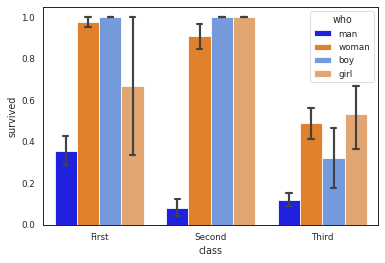

In [ ]:
sns.barplot(data = lab3_data, x = 'class', y = 'survived', hue='who', capsize=0.05, ci=90, palette=color_dict)

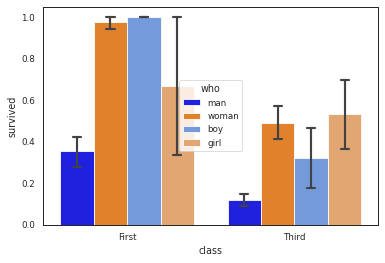

In [ ]:
x_order = ['First', 'Third']
sns.barplot(data = lab3_data, x = 'class', order = x_order, y = 'survived', hue='who', capsize=0.05, ci=90, palette=color_dict)

[Text(0, 0.5, 'Mean survival rate'), Text(0.5, 0, 'Boarding Class')]

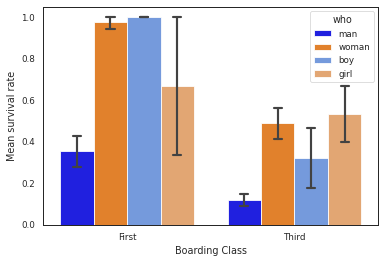

In [ ]:
axes=sns.barplot(data = lab3_data, x = 'class', order = x_order, y = 'survived', hue='who', capsize=0.05, ci=90, palette=color_dict)
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


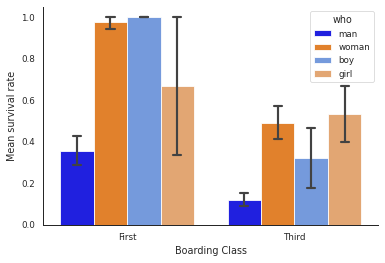

In [ ]:
axes=sns.barplot(data = lab3_data, x = 'class', order = x_order, y = 'survived', hue='who', capsize=0.05, ci=90, palette=color_dict)
axes.set(xlabel='Boarding Class', ylabel='Mean survival rate')
sns.despine()
from google.colab import drive 
drive.mount('/content/drive')
plt.savefig("/content/drive/My Drive/bar_plot_titanic.pdf", bbox_inches='tight')

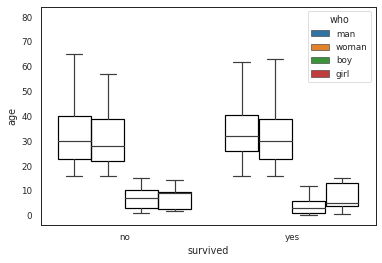

In [ ]:
lab3_data.rename(columns={'survived':'survived_bin'}, inplace=True)
lab3_data.rename(columns={'survived_str':'survived'}, inplace=True)
sns.boxplot(data = lab3_data, x = 'survived', y = 'age', hue='who', fliersize=0, boxprops={'edgecolor':'black', 'facecolor':(1,1,1,0)})

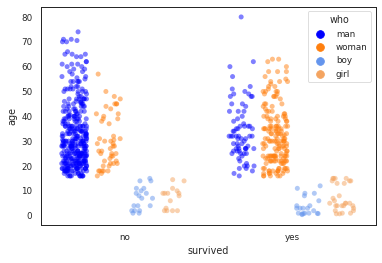

In [ ]:
sns.stripplot(data = lab3_data, x = 'survived', y = 'age', hue = 'who', dodge = True, jitter =0.3, alpha=.5, palette=color_dict)

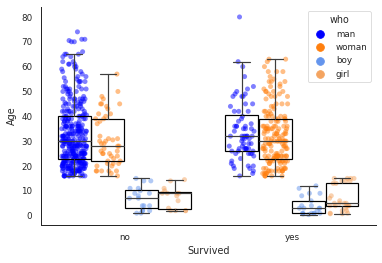

In [ ]:
axes2=sns.boxplot(data = lab3_data, x = 'survived', y = 'age', hue='who', fliersize=0, zorder = 5, boxprops={'edgecolor':'black', 'facecolor':(1,1,1,0)})
axes2=sns.stripplot(data = lab3_data, x = 'survived', y = 'age', hue = 'who', zorder = 0, dodge = True, jitter =0.3, alpha=.5, palette=color_dict)
handles, labels = axes2.get_legend_handles_labels()
plt.legend(handles[4:8], labels[4:8], title='who')
axes2.set(xlabel='Survived', ylabel='Age')
sns.despine()
plt.savefig("/content/drive/My Drive/box_plot_titanic.pdf", bbox_inches='tight')

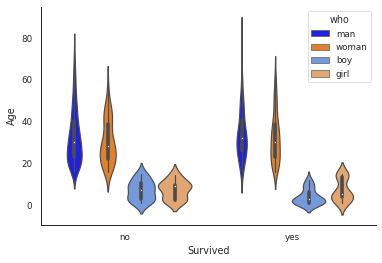

In [ ]:
sns.set_style("white")
sns.set_context("paper")
axes3=sns.violinplot(data=lab3_data, x='survived', y='age', hue = 'who',  palette=color_dict)
axes3.set(xlabel='Survived', ylabel='Age')
sns.despine()
plt.savefig("/content/drive/My Drive/violin_plot_titanic.pdf", bbox_inches='tight')

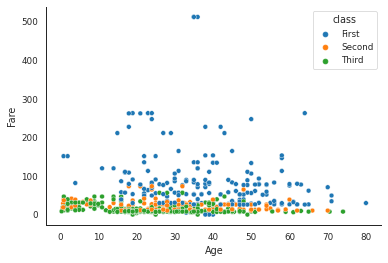

In [ ]:
sns.set_style("white")
sns.set_context("paper")
axes4=sns.scatterplot(data=lab3_data, x='age', y='fare', hue='class')
axes4.set(xlabel = 'Age', ylabel = 'Fare')
sns.despine()
plt.savefig("/content/drive/My Drive/scater_plot_titanic.pdf", bbox_inches='tight')

In [ ]:
lab3_data_subset=lab3_data[['class','who','fare']]
lab3_data_subset=lab3_data_subset.dropna(how='any')
lab3_data_subsetAverage=lab3_data_subset.groupby(['class','who']).mean()
lab3_data_subsetAverage=lab3_data_subsetAverage.reset_index()
lab3_data_subsetAverage.head()

,class,who,fare
0,First,boy,117.802767
1,First,girl,160.962500
2,First,man,65.951086
3,First,woman,104.317995
4,Second,boy,27.306022


In [ ]:
matrix_data = lab3_data_subsetAverage.pivot('class', 'who', 'fare')

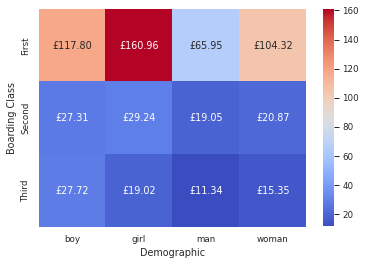

In [ ]:
axes5 = sns.heatmap(data=matrix_data, annot=True, fmt='.2f',cmap='coolwarm')
for text in axes5.texts: text.set_text('£' + text.get_text())
axes5.set(xlabel='Demographic', ylabel='Boarding Class', xticklabels=['boy','girl','man','woman'])
plt.savefig("/content/drive/My Drive/heatmap_plot_titanic.pdf", bbox_inches='tight')